In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
#dataset_path = '/content/gdrive/MyDrive/SoftCom Lab/Dataset/train2.txt'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import re
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset_path = '/content/gdrive/MyDrive/SoftCom Lab/Dataset/train_new.txt'

train_df = pd.read_csv(dataset_path, sep='\t', header=None, names=['Tag', 'Comment'])

test_df = pd.read_csv('/content/gdrive/MyDrive/SoftCom Lab/Dataset/test2.txt', sep='\t', header=None, names=['Tag', 'Comment'])

In [ ]:
train_df.head()

,Tag,Comment
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা..."
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগে...
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্...
4,angry,রাতের বেলা আবার কিসের সকাল।


In [ ]:
train_df['Labels'] = None
for i in range(len(train_df)):
  if train_df.Tag[i] == 'happy':
    train_df.Labels[i]=0;
  elif train_df.Tag[i] == 'sad':
    train_df.Labels[i]=1;
  elif train_df.Tag[i] == 'fear':
    train_df.Labels[i]=2;
  elif train_df.Tag[i] == 'angry':
    train_df.Labels[i]=3;
  elif train_df.Tag[i] == 'surprise':
    train_df.Labels[i]=4;
  elif train_df.Tag[i] == 'disgust':
    train_df.Labels[i]=5;
test_df['Labels'] = None
for i in range(len(test_df)):
  if test_df.Tag[i] == 'happy':
    test_df.Labels[i]=0;
  elif test_df.Tag[i] == 'sad':
    test_df.Labels[i]=1;
  elif test_df.Tag[i] == 'fear':
    test_df.Labels[i]=2;
  elif test_df.Tag[i] == 'angry':
    test_df.Labels[i]=3;
  elif test_df.Tag[i] == 'surprise':
    test_df.Labels[i]=4;
  elif test_df.Tag[i] == 'disgust':
    test_df.Labels[i]=5;

In [ ]:
train_df.head()

,Tag,Comment,Labels
0,sad,"বরাবর, মাননীয় প্রধানমন্ত্রী গণপ্রজাতন্ত্রী বা...",1
1,sad,তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু...,1
2,angry,দেশকি মধ্যম আয়ের দেশে রুপান্তর হচ্ছে নাকি মগে...,3
3,happy,আমি গর্বিত আমি মুসলিম। আমি সংগ্রামী। আমি যোদ্...,0
4,angry,রাতের বেলা আবার কিসের সকাল।,3


In [ ]:
#checking for Null values
train_df.info()
print()
test_df.info()
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4700 entries, 0 to 4699
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tag      4700 non-null   object
 1   Comment  4700 non-null   object
 2   Labels   4700 non-null   object
dtypes: object(3)
memory usage: 110.3+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tag      940 non-null    object
 1   Comment  940 non-null    object
 2   Labels   940 non-null    object
dtypes: object(3)
memory usage: 22.2+ KB



In [ ]:
train_df["Tag"].value_counts()

happy       1500
sad         1000
angry       1000
disgust      500
surprise     400
fear         300
Name: Tag, dtype: int64

In [ ]:
test_df["Tag"].value_counts()

happy       300
angry       200
sad         200
disgust     100
surprise     80
fear         60
Name: Tag, dtype: int64

In [ ]:
#sample text from dataset
sample = train_df["Comment"][1]
print(sample)

তদন্ত করে লাভ কী ? কোন দিন কোন তদন্তের পর কিছু হয়েছে বলে কী আপনার মন পরে ? রাজনৈতিক শক্তির সামনে তদন্ত কিছুই করতে পারবে না ! আর তাই আমাদের সামান্য মাথাব্যাথা, পেট ব্যাথা হলে বা কলে পরিস্কার পানি না পেলে, সঠিক বিচার না পেলে আমরা আমাদের মাননীয় প্রধামন্ত্রীর দৃস্টি আর্কষন করে থাকি ! কিন্তু সকল দায়িত্ব কী তার একা ? তিনিই বা কেন লাথি দিয়ে এদের বহিস্কার করতে পারে না ?


In [ ]:
print(train_df.columns)

Index(['Tag', 'Comment', 'Labels'], dtype='object')


In [ ]:
x_train, x_test, y_train, y_test = train_df["Comment"], test_df["Comment"], train_df["Labels"], test_df["Labels"]

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from keras import layers
from keras.models import Sequential

EPOCHS= 50
act= "swish"
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
#converting text to vectors via tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
TEST = tokenizer.texts_to_sequences(test_df["Comment"])

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
#calculating max length of the vector
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 584


In [ ]:
#Zero padding every vector so that they are the same size
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
TEST = pad_sequences(TEST, padding='post', maxlen=maxlen)

In [ ]:
from keras.utils import to_categorical

dummy_y_test = to_categorical(y_test, num_classes=6)
dummy_y_train = to_categorical(y_train, num_classes=6)


In [ ]:
!pip install fasttext
import fasttext.util


In [ ]:
#fasttext.util.download_model('bn', if_exists='ignore')

In [ ]:
#ft = '/content/gdrive/MyDrive/SoftCom Lab/Dataset/cc.bn.300.bin'

In [ ]:
import fasttext

# Load the pre-trained FastText word vectors for Bengali
ft_model_path = '/content/gdrive/MyDrive/SoftCom Lab/Dataset/cc.bn.300.bin'  # Replace with the correct path

# Function to get word vectors
def get_embedding_vectors(tokenizer, model_path, dim=300):
    embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, dim))

    # Load the FastText model
    ft_model = fasttext.load_model(model_path)

    for word, i in tokenizer.word_index.items():
        try:
            embedding_vector = ft_model.get_word_vector(word)
            embedding_matrix[i] = embedding_vector
        except KeyError:
            pass  # Word not found in FastText model

    return embedding_matrix

# Get the embedding matrix using the loaded model
embedding_matrix = get_embedding_vectors(tokenizer, ft_model_path)


In [ ]:
#embedding_matrix = get_embedding_vectors(tokenizer)

In [ ]:
#defining CNN-BiLSTM model
embedding_dim = 300

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights = [embedding_matrix], input_length=maxlen))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation=act))
model.add(layers.MaxPool1D(pool_size=3))
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation=act))
model.add(layers.MaxPool1D(pool_size=3))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.LSTM(128)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256,activation=act))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation="softmax"))
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 584, 300)          5178600   
                                                                 
 dropout_15 (Dropout)        (None, 584, 300)          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 582, 64)           57664     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 194, 64)           0         
 g1D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 194, 64)           0         
                                                                 
 conv1d_7 (Conv1D)           (None, 192, 64)           12352     
                                                      

In [ ]:
checkpoint_filepath = './Checkpoint/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
history = model.fit(X_train, dummy_y_train, epochs=EPOCHS, verbose=1, validation_data=(X_test, dummy_y_test), batch_size=8, callbacks=[model_checkpoint_callback])
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
588/588 [==============================] - 46s 62ms/step - loss: 1.6263 - accuracy: 0.3389 - val_loss: 1.4510 - val_accuracy: 0.4085
Epoch 2/50
588/588 [==============================] - 14s 24ms/step - loss: 1.4135 - accuracy: 0.4455 - val_loss: 1.3431 - val_accuracy: 0.4766
Epoch 3/50
588/588 [==============================] - 13s 22ms/step - loss: 1.1925 - accuracy: 0.5477 - val_loss: 1.3133 - val_accuracy: 0.5021
Epoch 4/50
588/588 [==============================] - 13s 21ms/step - loss: 0.9951 - accuracy: 0.6377 - val_loss: 1.3733 - val_accuracy: 0.5234
Epoch 5/50
588/588 [==============================] - 12s 21ms/step - loss: 0.8126 - accuracy: 0.6987 - val_loss: 1.5610 - val_accuracy: 0.5011
Epoch 6/50
588/588 [==============================] - 11s 19ms/step - loss: 0.7003 - accuracy: 0.7421 - val_loss: 1.6582 - val_accuracy: 0.4947
Epoch 7/50
588/588 [==============================] - 11s 19ms/step - loss: 0.5976 - accuracy: 0.7785 - val_loss: 2.0708 - val_accuracy:

In [ ]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

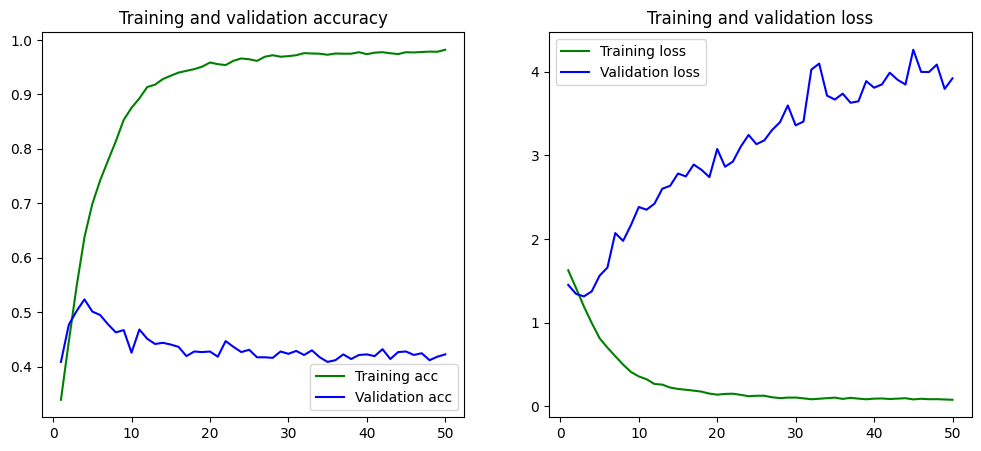

In [ ]:
PlotGraph(history)

In [ ]:
print(f"Best Accuracy Achieved by Model: {max(history.history['val_accuracy'])}")

Best Accuracy Achieved by Model: 0.5234042406082153


In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
predict = model.predict(TEST)
predict_class = np.argmax(predict, axis=1)
predict_class = np.array(predict_class)
predict_class

30/30 [==============================] - 1s 7ms/step


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 1, 0, 1, 1, 1, 0, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 1, 1, 1, 0, 3, 0, 3,
       0, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 1, 0, 1, 0, 1,
       1, 1, 3, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       3, 3, 3, 3, 1, 1, 0, 1, 0, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 1,
       1, 3, 3, 1, 0, 1, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 3,
       1, 3, 1, 3, 1, 1, 0, 3, 0, 0, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 0, 3, 3, 3, 1,
       1, 3, 1, 1, 0, 0, 1, 1, 0, 1, 3, 1, 1, 3, 1,

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

t_df = pd.to_numeric(test_df["Labels"])

cm = confusion_matrix(t_df, predict_class)
cm

array([[247,  40,   0,  13,   0,   0],
       [ 39, 134,   0,  27,   0,   0],
       [  9,  46,   0,   5,   0,   0],
       [ 18,  71,   0, 111,   0,   0],
       [  5,  67,   0,   8,   0,   0],
       [ 24,  56,   0,  20,   0,   0]])

<Axes: >

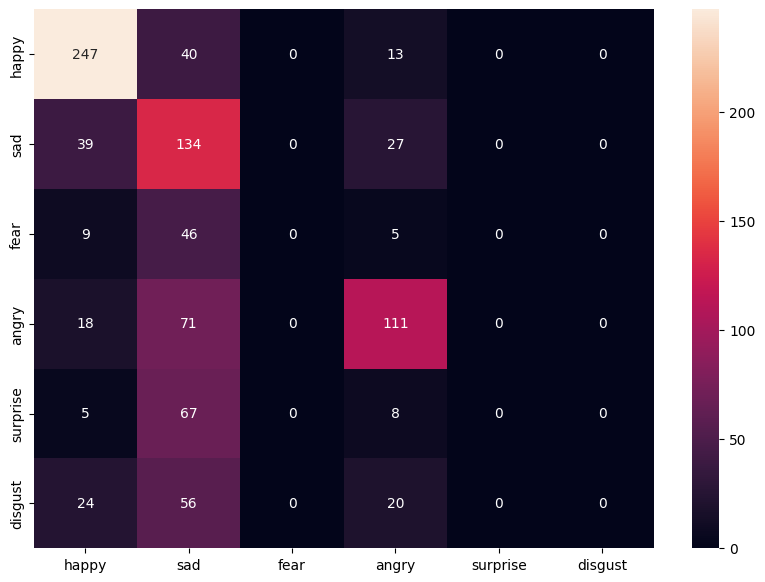

In [ ]:
df_cm = pd.DataFrame(cm, index=["happy", "sad", "fear", "angry", "surprise", "disgust"], columns=["happy", "sad", "fear", "angry", "surprise", "disgust"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,annot=True, fmt ="d")


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(t_df, predict_class, target_names =["happy", "angry", "sad", "disgust", "surprise", "fear"]))

              precision    recall  f1-score   support

       happy       0.72      0.82      0.77       300
       angry       0.32      0.67      0.44       200
         sad       0.00      0.00      0.00        60
     disgust       0.60      0.56      0.58       200
    surprise       0.00      0.00      0.00        80
        fear       0.00      0.00      0.00       100

    accuracy                           0.52       940
   macro avg       0.27      0.34      0.30       940
weighted avg       0.43      0.52      0.46       940



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
